In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [40]:
df = pd.read_csv("../regression/salary_data_regression.csv")
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [41]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

df_cleaned['YearsExperience'] = pd.to_numeric(df_cleaned['Years of Experience'], errors='coerce')
df_cleaned['Salary'] = pd.to_numeric(df_cleaned['Salary'], errors='coerce')


Original shape: (375, 6)
Cleaned shape: (324, 6)


In [42]:
df_cleaned = df_cleaned[(df_cleaned['Salary'] < df_cleaned['Salary'].quantile(0.95))]


In [43]:
# Basic info
print(df_cleaned.info())

print(df_cleaned.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 371
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  297 non-null    float64
 1   Gender               297 non-null    object 
 2   Education Level      297 non-null    object 
 3   Job Title            297 non-null    object 
 4   Years of Experience  297 non-null    float64
 5   Salary               297 non-null    float64
 6   YearsExperience      297 non-null    float64
dtypes: float64(4), object(3)
memory usage: 18.6+ KB
None
              Age  Years of Experience         Salary  YearsExperience
count  297.000000           297.000000     297.000000       297.000000
mean    36.363636             9.111111   91819.360269         9.111111
std      6.584874             6.080355   41786.702235         6.080355
min     23.000000             0.000000     350.000000         0.000000
25%     31.000000             3.000000

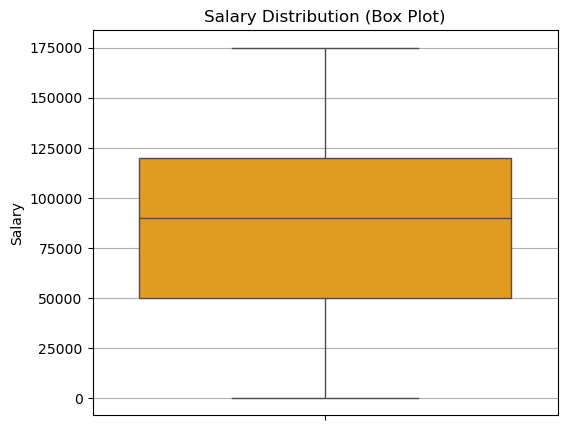

In [44]:
# Box Plot - Salary Distribution
plt.figure(figsize=(6, 5))
sns.boxplot(y='Salary', data=df_cleaned, color='orange')
plt.title('Salary Distribution (Box Plot)')
plt.ylabel('Salary')
plt.grid(True, axis='y')
plt.show()



/var/folders/xn/nlz9z9sn7k92r98bkxjc8h1w0000gn/T/ipykernel_1487/4212312692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Salary', data=avg_salary_by_gender, palette='Set2')


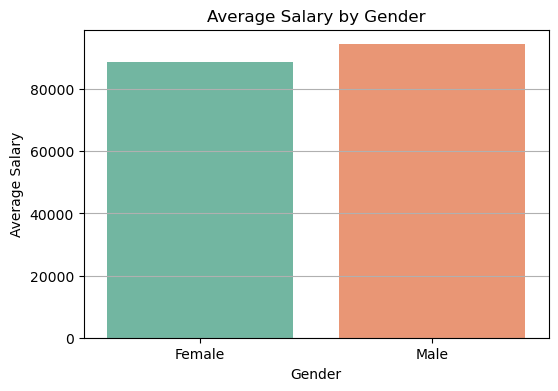

In [45]:
# Group by Gender and compute average salary
avg_salary_by_gender = df_cleaned.groupby('Gender')['Salary'].mean().reset_index()

# Bar plot - Average Salary by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Salary', data=avg_salary_by_gender, palette='Set2')
plt.title('Average Salary by Gender')
plt.ylabel('Average Salary')
plt.xlabel('Gender')
plt.grid(axis='y')
plt.show()


In [46]:
X = df_cleaned[['Years of Experience']] # Features
y = df_cleaned['Salary'] # Target


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)
print(y_pred)


[ 46802.64467352  43647.3433016  103598.06936798  59423.85016118
 109908.67211181 166704.09680627 135151.08308712  43647.3433016
  53113.24741735 147772.28857478 128840.48034329  72045.05564883
  65734.452905    72045.05564883 103598.06936798 154082.89131861
  46802.64467352 122529.87759946  90976.86388032  53113.24741735
  53113.24741735  78355.65839266  84666.26113649 109908.67211181
 109908.67211181 135151.08308712  53113.24741735 128840.48034329
  34181.43918586 135151.08308712 135151.08308712 147772.28857478
  40492.04192969 191946.50778158  40492.04192969  46802.64467352
 141461.68583095 109908.67211181  84666.26113649  46802.64467352
  84666.26113649 122529.87759946  84666.26113649  65734.452905
 122529.87759946  90976.86388032  46802.64467352  78355.65839266
  78355.65839266  59423.85016118 116219.27485563 135151.08308712
  53113.24741735 128840.48034329 128840.48034329  40492.04192969
 128840.48034329  84666.26113649  59423.85016118  90976.86388032]


In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error: 341617906.60
R-squared (R²): 0.81


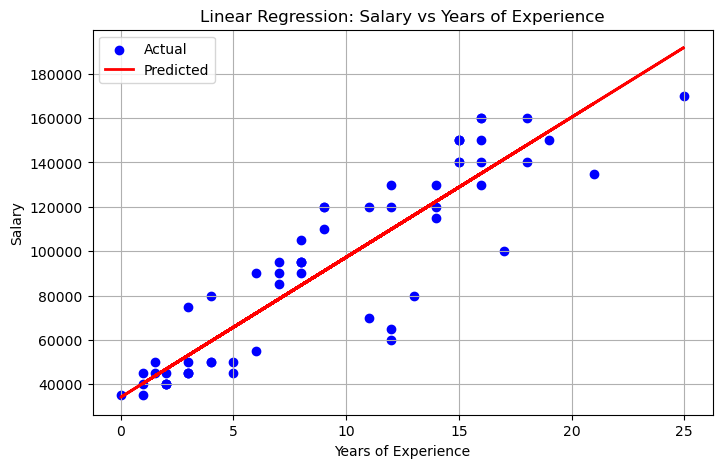

In [50]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()
